In [1]:
# Gradient Descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.interpolate
from matplotlib import rcParams
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
rcParams.update({'font.size': 18})


# An example of Gradient Descent

$f (x, y) = x^2 + 3y^2$

Gradient of $f$ :
$\nabla f  = 2x\hat{x} + 6y\hat{y}$

In [3]:
h = 0.5
x = np.arange(-6,6+h,h)
y = np.arange(-6,6+h,h)

X,Y = np.meshgrid(x,y)
x = np.zeros(10)
y = np.zeros(10)
f = np.zeros(10)

Fquad = np.power(X,2) + 3*np.power(Y,2)

$\delta = \frac{x^2 + 9y^2}{2x^2 + 54y^2}$

In [4]:
x[0] = 3  # Initial guess
y[0] = 2

f[0] = x[0]**2 + 3*y[0]**2 # Initial function value

for j in range(len(x)-1):
    Del = (x[j]**2 + 9*y[j]**2)/(2*x[j]**2 + 54*y[j]**2)
    x[j+1] = (1 - 2*Del)*x[j] # update values
    y[j+1] = (1 - 6*Del)*y[j]
    f[j+1] = x[j+1]**2 + 3*y[j+1]**2

    if np.abs(f[j+1]-f[j]) < 10**(-6): # check convergence
        x = x[:j+2]
        y = y[:j+2]
        f = f[:j+2]
        break

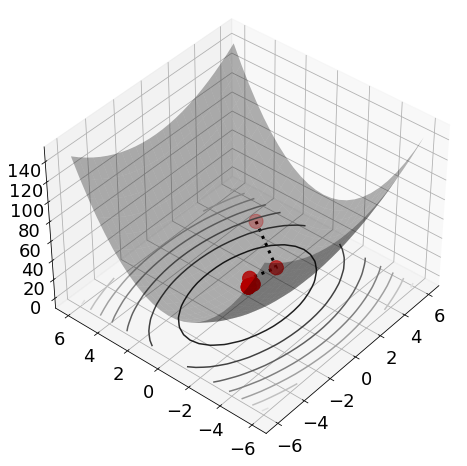

In [5]:
fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'},figsize=(16,8) )
# Plot function f(x,y)
ax.plot_surface(X, Y, Fquad,linewidth=0,color='k',alpha=0.3)
# Descent path
ax.scatter(x,y,f,'o',color='r',s=200) # Dots
ax.plot(x,y,f,':',color='k',linewidth=3) # Lines
# Contour on the bottom
ax.contour(X, Y, Fquad, zdir='z', offset=ax.get_zlim()[0], cmap='gray')
ax.view_init(elev=40, azim=-140)
plt.show()

## Computing the gradient descent with fmin

In [ ]:
h = 0.1
x = np.arange(-6,6+h,h)
y = np.arange(-6,6+h,h)
X,Y = np.meshgrid(x,y)

F1 = 1.5 - 1.6*np.exp(-0.05*(3*np.power(X+3,2)+np.power(Y+3,2)))
F = F1 + 0.5 - np.exp(-0.1*(3*np.power(X-3,2)+np.power(Y-3,2)))

dFy,dFx = np.gradient(F,h,h)

F_interp = scipy.interpolate.RectBivariateSpline(x,y,F)
dFx_interp = scipy.interpolate.RectBivariateSpline(x,y,dFx)
dFy_interp = scipy.interpolate.RectBivariateSpline(x,y,dFy)


x0 = np.array([4,0,-5])
y0 = np.array([0,-5,2])

def delsearch(Del,t):
    x,y,dfx,dfy,X,Y,F = t
    x0 = x-Del*dfx
    y0 = y-Del*dfy
    return F_interp(x0,y0)


for jj in range(3):
    x = np.zeros(10)
    y = np.zeros(10)
    f = np.zeros(10)
    x[0] = x0[jj]
    y[0] = y0[jj]
    f[0] = F_interp(x[0],y[0])
    dfx = dFx_interp(x[0],y[0])
    dfy = dFy_interp(x[0],y[0])
    for j in range(len(x)-1):
        t = x[j],y[j],dfx,dfy,X,Y,F
        Del = scipy.optimize.fmin(delsearch,0.2,args=(t,),disp=False);
        x[j+1] = x[j]-Del*dfx # Update x, y, and f
        y[j+1] = y[j]-Del*dfy
        f[j+1] = F_interp(x[j+1],y[j+1])
        dfx = dFx_interp(x[j+1],y[j+1])
        dfy = dFy_interp(x[j+1],y[j+1])

        if np.abs(f[j+1]-f[j]) < 10**(-6):
            x = x[:j+2]
            y = y[:j+2]
            f = f[:j+2]
            break

    if jj == 0:
        x1 = x
        y1 = y
        f1 = f
    if jj == 1:
        x2 = x
        y2 = y
        f2 = f
    if jj == 2:
        x3 = x
        y3 = y
        f3 = f

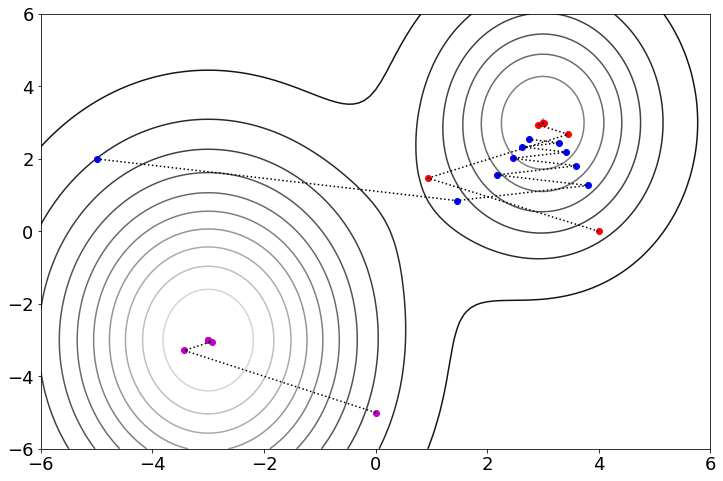

In [7]:
rcParams['figure.figsize'] = [12, 8]
plt.figure()
plt.contour(X,Y,F-1,10,cmap='binary')
plt.plot(x1,y1,'o',color='r')
plt.plot(x1,y1,':',color='k')
plt.plot(x2,y2,'o',color='m')
plt.plot(x2,y2,':',color='k')
plt.plot(x3,y3,'o',color='b')
plt.plot(x3,y3,':',color='k')
plt.show()

<ipython-input-8-c0fc606ff8b7>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x1,y1,f1,'o',color='r',MarkerSize=10)
<ipython-input-8-c0fc606ff8b7>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x2,y2,f2,'o',color='m',MarkerSize=10)
<ipython-input-8-c0fc606ff8b7>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x3,y3,f3,'o',color='b',MarkerSize=10)


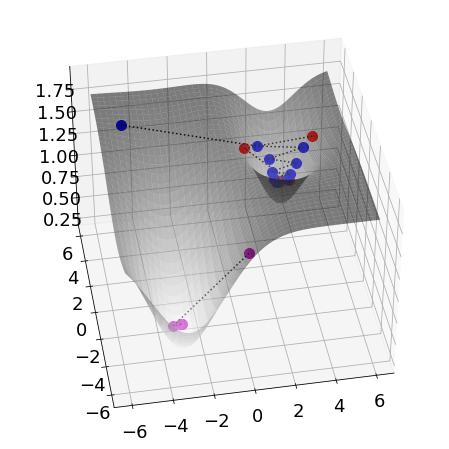

In [8]:
fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, F-0.2,cmap='binary',alpha=0.5)
ax.plot(x1,y1,f1,'o',color='r',MarkerSize=10)
ax.plot(x1,y1,f1,':',color='k')
ax.plot(x2,y2,f2,'o',color='m',MarkerSize=10)
ax.plot(x2,y2,f2,':',color='k')
ax.plot(x3,y3,f3,'o',color='b',MarkerSize=10)
ax.plot(x3,y3,f3,':',color='k')
ax.view_init(elev=40, azim=-100)
plt.show()

# Alternating Descent

In [9]:
h = 0.1
x = np.arange(-6,6+h,h)
y = np.arange(-6,6+h,h)
X,Y = np.meshgrid(x,y)

F1 = 1.5 - 1.6*np.exp(-0.05*(3*np.power(X+3,2)+np.power(Y+3,2)))
F = F1 + 0.5 - np.exp(-0.1*(3*np.power(X-3,2)+np.power(Y-3,2)))

F_interp = scipy.interpolate.RectBivariateSpline(x,y,F)

x0 = np.array([4,0,-5])
y0 = np.array([0,-5,2])

for jj in range(3):
    xa = np.zeros(5)
    ya = np.zeros(5)
    f = np.zeros(5)
    xa[0] = x0[jj]
    ya[0] = y0[jj]
    f[0] = F_interp(xa[0],ya[0])

    fx = F_interp(xa[0],y)
    xa[1]=xa[0]
    ya[1]=y[np.argmin(fx)]

    fy = F_interp(x,ya[1])
    ya[2]=ya[1]
    xa[2]=x[np.argmin(fy)]

    fx = F_interp(xa[2],y)
    xa[3]=xa[2]
    ya[3]=y[np.argmin(fx)]

    fy = F_interp(x,ya[3])
    ya[4]=ya[3]
    xa[4]=x[np.argmin(fy)]

    for j in range(1,5):
        f[j] = F_interp(xa[j],ya[j])

    if jj == 0:
        x1 = xa
        y1 = ya
        f1 = f
    if jj == 1:
        x2 = xa
        y2 = ya
        f2 = f
    if jj == 2:
        x3 = xa
        y3 = ya
        f3 = f

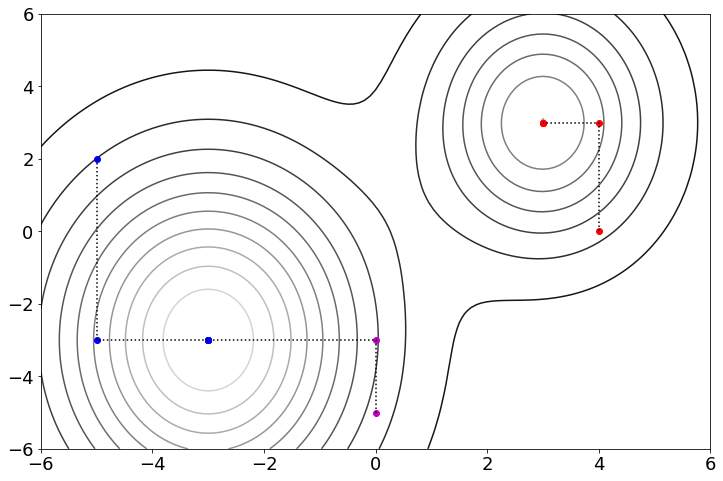

In [10]:
rcParams['figure.figsize'] = [12, 8]
plt.figure()
plt.contour(X,Y,F-1,10,cmap='binary')
plt.plot(x1,y1,'o',color='r')
plt.plot(x1,y1,':',color='k')
plt.plot(x2,y2,'o',color='m')
plt.plot(x2,y2,':',color='k')
plt.plot(x3,y3,'o',color='b')
plt.plot(x3,y3,':',color='k')
plt.show()

<ipython-input-11-c0fc606ff8b7>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x1,y1,f1,'o',color='r',MarkerSize=10)
<ipython-input-11-c0fc606ff8b7>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x2,y2,f2,'o',color='m',MarkerSize=10)
<ipython-input-11-c0fc606ff8b7>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x3,y3,f3,'o',color='b',MarkerSize=10)


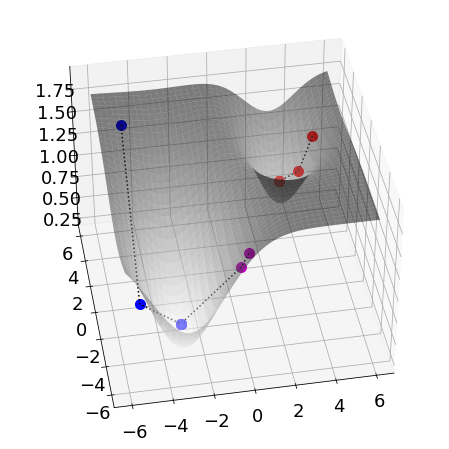

In [11]:
fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, F-0.2,cmap='binary',alpha=0.5)
ax.plot(x1,y1,f1,'o',color='r',MarkerSize=10)
ax.plot(x1,y1,f1,':',color='k')
ax.plot(x2,y2,f2,'o',color='m',MarkerSize=10)
ax.plot(x2,y2,f2,':',color='k')
ax.plot(x3,y3,f3,'o',color='b',MarkerSize=10)
ax.plot(x3,y3,f3,':',color='k')
ax.view_init(elev=40, azim=-100)
plt.show()